## ML-Prac. HW03
## Alireza Ansari
### Student ID: 400123114

***

## Logistic Regression

### Question 01- Part *1*

First, we import necessary libraries:

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
import time

At this point, we import the 'mitbih' dataset and explore it!

For this purpose, first, we upload the 'mitbih' dataset on google drive.

In [2]:
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/ML-Semester04/Prac. HW03/mitbih.csv')
df.head()

Mounted at /content/drive


,9.779411554336546741e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659335e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292723222e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In the following section, we split the data into train and test by 70 / 30 respectively

In [3]:
X=df.drop(columns=df.columns[-1])
y=df[df.columns[-1]][:]

[X_train, X_test, y_train, y_test]=train_test_split(X,y,stratify=y,random_state=1,test_size=0.3)
print(df.shape)
print(X_train.shape)
print(y_test.shape)

(109445, 188)
(76611, 187)
(32834,)


In the following section, we define a Logistic Regression Classifier using 'SGDClassifier'. Then, validate our model with 20% of training data **without Regularization.**

Best learning rate: 0.021544346900318846


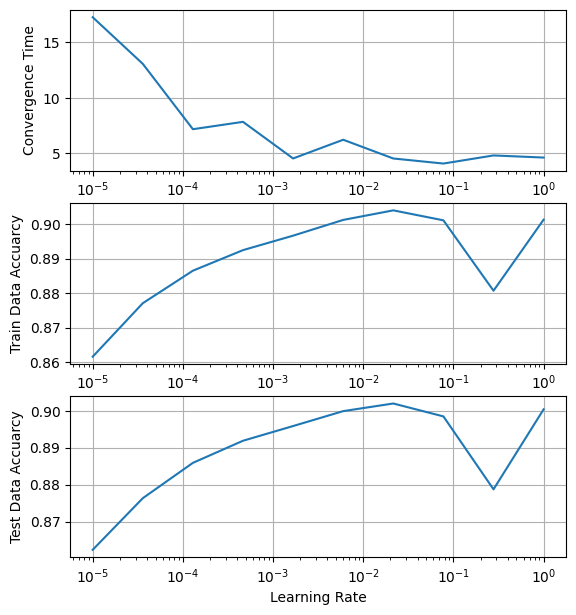

In [5]:
t=[]
steps_num=10 # number of different learning rates
steps=np.logspace(-5,0,num=steps_num) 
test_score=[]
train_score=[]

for i in range(steps_num):
  t0 = time.time()
  # defines logistic regression classifier with validation using 20% of the training data and without regularization
  clf= SGDClassifier(loss='log_loss',learning_rate='constant',eta0=steps[i],validation_fraction=0.2,alpha=0) 
  clf.fit(X_train, y_train)
  t.append(time.time()-t0)                        # stores convergence time for the specified learning rate
  train_score.append(clf.score(X_train,y_train))  # stores training data score for the specified learning rate
  test_score.append(clf.score(X_test,y_test))     # stores test data score for the specified learning rate

fig, axs = plt.subplots(3,1)
plt.subplots_adjust(top=1.25)

axs[0].plot(steps,t)
axs[0].grid()
axs[0].set(xlabel='Learning Rate', ylabel='Convergence Time')
axs[0].set_xscale('log')

axs[1].plot(steps,train_score)
axs[1].grid()
axs[1].set(xlabel='Learning Rate', ylabel='Train Data Accuarcy')
axs[1].set_xscale('log')

axs[2].plot(steps,test_score)
axs[2].grid()
axs[2].set(xlabel='Learning Rate', ylabel='Test Data Accuarcy')
axs[2].set_xscale('log')

best_lr=steps[test_score.index(np.max(test_score))] # stores the best learning rate based on the test data scores
print(f'Best learning rate: {best_lr}')

As we can see from the plots above, at learning rate 0.0215, The highest accuracy and the shortest learning time are obtained. At the next section, the confusion matrix will e 

In [6]:
# prints accuarcy of the best model without regularization
clf= SGDClassifier(loss='log_loss',learning_rate='constant',eta0=best_lr,validation_fraction=0.2,alpha=0).fit(X_train, y_train)
print(f'accuarcy of the best model without regularization for training datas: {clf.score(X_train,y_train)}')
print(f'accuarcy of the best model without regularization for test datas: {clf.score(X_test,y_test)}')

# prints confusion matrix of the best model without regularization
print('\nConfusion Matrix of All the Data:')
confusion_matrix(y, clf.predict(X))

accuarcy of the best model without regularization for training datas: 0.9031340146976283
accuarcy of the best model without regularization for test datas: 0.9022050313699215

Confusion Matrix of All the Data:


array([[88530,    61,  1857,     7,   133],
       [ 2317,   303,   151,     1,     7],
       [ 4109,    61,  2957,     4,   105],
       [  678,     0,    83,    42,     0],
       [  944,     1,   113,     0,  6981]])

**According to the above results, it can be seen that a very small learning coefficient increases the convergence time and a very large learning coefficient also causes a decrease in test accuracy (overfitting) and sometimes causes the algorithm to fail to converge.**

***

### Question 01- Part 2

In this section, we will try to use GNB. For this purpose, we develope our naive bayes model and Extract the confusion matrix like last part:

In [7]:
nb=MultinomialNB()
t0 = time.time()
nb=nb.fit(X_train,y_train)
t=time.time()
print(f'training time of the GNB model for the training data: {t-t0} seconds')
print(f'accuarcy of the GNB model for the training data: {nb.score(X_train,y_train)}')
print(f'accuarcy of the GNB model for the test datas: {nb.score(X_test,y_test)}')
print('\nConfusion Matrix of All the Data:')
confusion_matrix(y, nb.predict(X))

training time of the GNB model for the training data: 0.08502840995788574 seconds
accuarcy of the GNB model for the training data: 0.7142577436660532
accuarcy of the GNB model for the test datas: 0.7117012852530913

Confusion Matrix of All the Data:


array([[68860,   549,  4402, 11029,  5748],
       [ 2091,   328,    95,   224,    41],
       [ 2996,   259,  1101,   990,  1890],
       [  133,     1,     8,   657,     4],
       [  810,     0,     1,    86,  7142]])

According to the above results, the accuracy of the GNB model is less than Logistic Regression, because firstly, the number of training data is large, and secondly, the features are probably not independent according to the type of data (time series), and this assumption is against the main Naïve assumption. Bayes means independence of features in each class.
Also, training in the GNB method is completed in less time. Because learning in GNB is done once and in Logistic Regression it is done recursively. **bold text**

***

### Question 01- Part 3

By adding L2 regularization(in order to preventing Overfitting) in the problem that was solved in part 1, we can see:

Best regularization parameter: 1e-08


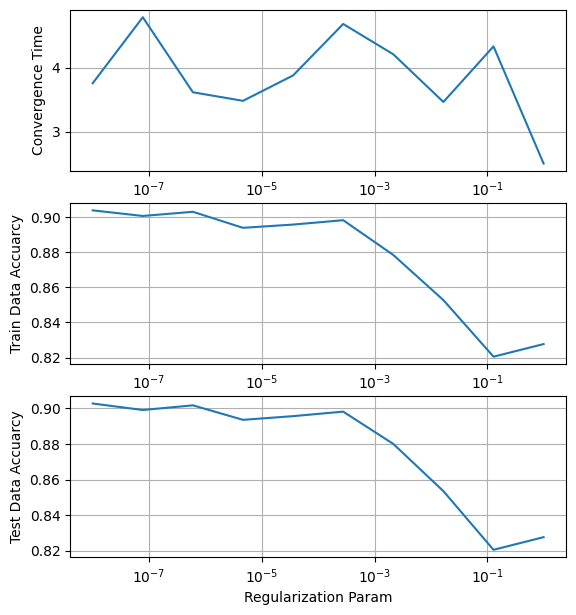

In [8]:
# exactly like estimating learning rate, but for regularization parameter 
t=[]
steps_num=10
steps=np.logspace(-8,0,num=steps_num)
test_score=[]
train_score=[]

for i in range(steps_num):
  t0 = time.time()
  clf= SGDClassifier(loss='log_loss',learning_rate='constant',eta0=best_lr,validation_fraction=0.2,alpha=steps[i])
  clf.fit(X_train, y_train)
  t.append(time.time()-t0)
  train_score.append(clf.score(X_train,y_train))
  test_score.append(clf.score(X_test,y_test))

fig, axs = plt.subplots(3,1)
plt.subplots_adjust(top=1.25)

axs[0].plot(steps,t)
axs[0].set(xlabel='Regularization Param', ylabel='Convergence Time')
axs[0].grid()
axs[0].set_xscale('log')

axs[1].plot(steps,train_score)
axs[1].set(xlabel='Regularization Param', ylabel='Train Data Accuarcy')
axs[1].grid()
axs[1].set_xscale('log')

axs[2].plot(steps,test_score)
axs[2].set(xlabel='Regularization Param', ylabel='Test Data Accuarcy')
axs[2].grid()
axs[2].set_xscale('log')

best_rp=steps[test_score.index(np.max(test_score))]
print(f'Best regularization parameter: {best_rp}')

As we can see from the plots above, at regularization parameter 1e-8, The highest accuracy and the shortest learning time are obtained. At the next section, the confusion matrix will e 

In [9]:
# prints accuarcy of the best model with regularization
clf= SGDClassifier(loss='log_loss',learning_rate='constant',eta0=best_lr,validation_fraction=0.2,alpha=best_rp).fit(X_train, y_train)
print(f'accuarcy of the best model with regularization for training datas: {clf.score(X_train,y_train)}')
print(f'accuarcy of the best model with regularization for test datas: {clf.score(X_test,y_test)}')

# prints confusion matrix of the best model with regularization
print('Confusion Matrix of All the Data:\n')
confusion_matrix(y, clf.predict(X))

accuarcy of the best model with regularization for training datas: 0.9025988435081124
accuarcy of the best model with regularization for test datas: 0.9011086069318389
Confusion Matrix of All the Data:



array([[90057,    30,   411,     7,    83],
       [ 2468,   200,   105,     1,     5],
       [ 5437,    61,  1600,     5,   133],
       [  683,     0,    42,    78,     0],
       [ 1187,     2,    49,     0,  6801]])

**The reason for the smallness of the regularization parameter is the existence of sufficient data and Validation data.**

***

### Question 01- Part 04

In this part, the change of the ratio of the training data to the total data will be investigated.

[Text(0.5, 0, 'Train Data Percentage'),
 Text(0, 0.5, 'GNB Train Data Accuarcy')]

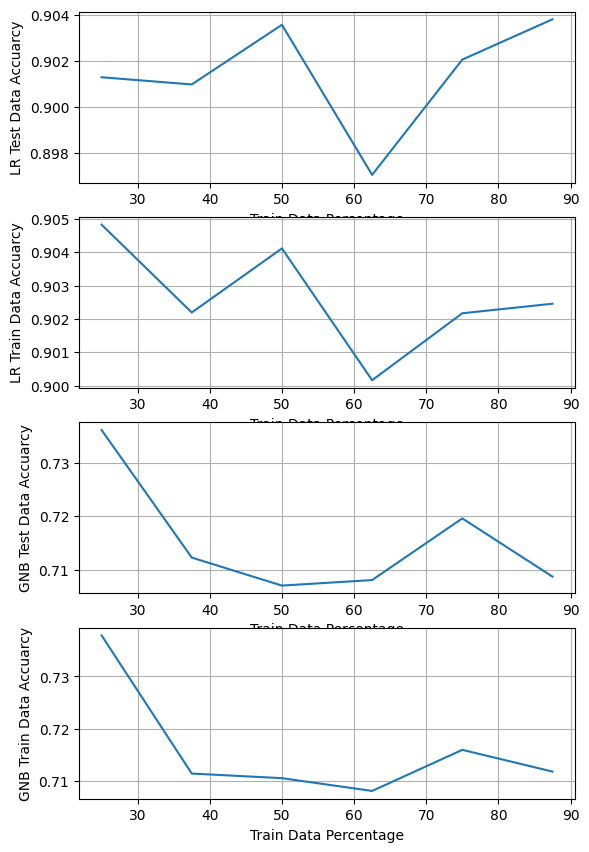

In [10]:
# plot the training and test curve based on different sizes of training samples for the best LR and GNB classifiers
X=df.drop(columns=df.columns[-1])
y=df[df.columns[-1]][:]

steps=np.arange(0.25,1,0.125) # array of different train data percentages
clf_train_score=np.zeros(len(steps))
clf_test_score=np.zeros(len(steps))
nb_test_score=np.zeros(len(steps))
nb_train_score=np.zeros(len(steps))

for i,step in enumerate(steps):
  [X_train, X_test, y_train, y_test]=train_test_split(X,y,stratify=y,train_size=step)
  # calculates accuracy for the best LR classifier
  clf= SGDClassifier(loss='log_loss',learning_rate='constant',eta0=best_lr,validation_fraction=0.2,alpha=best_rp).fit(X_train, y_train)
  clf_test_score[i]=clf.score(X_test,y_test)
  clf_train_score[i]=clf.score(X_train,y_train)
  # calculates accuracy for GNB classifier
  nb=MultinomialNB()
  nb=nb.fit(X_train,y_train)
  nb_test_score[i]=nb.score(X_test,y_test)
  nb_train_score[i]=nb.score(X_train,y_train)
  
fig, axs = plt.subplots(4,1)
plt.subplots_adjust(top=1.75)

axs[0].plot(steps*100,clf_test_score)
axs[0].grid()
axs[0].set(xlabel='Train Data Percentage', ylabel='LR Test Data Accuarcy')

axs[1].plot(steps*100,clf_train_score)
axs[1].grid()
axs[1].set(xlabel='Train Data Percentage', ylabel='LR Train Data Accuarcy')

axs[2].plot(steps*100,nb_test_score)
axs[2].grid()
axs[2].set(xlabel='Train Data Percentage', ylabel='GNB Test Data Accuarcy')

axs[3].plot(steps*100,nb_train_score)
axs[3].grid()
axs[3].set(xlabel='Train Data Percentage', ylabel='GNB Train Data Accuarcy')

**As we can see, By increasing the number of data, Logistic Regression provides better accuracy than GNB**

***

### Question 02- Paert 01

**In this part, By using 5-Fold Cross Validation, the data was divided into 5 parts and by training the Logistic Regression model without regularization, the accuracies for different values of the learning coefficient were recorded as follows.**

Best learning rate: 0.021544346900318846
accuarcy of the best model without regularization for training datas: 0.9020926444175265
accuarcy of the best model without regularization for test datas: 0.9027848841458957


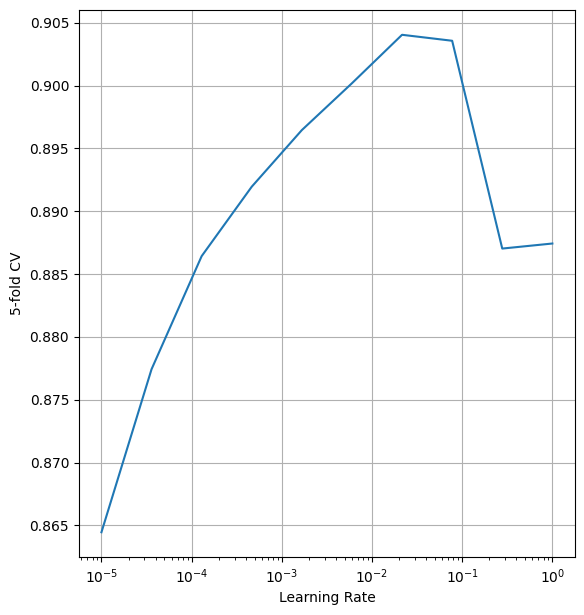

In [11]:
# 5-fold accuarcy for LR classifier without regularization
t=[]
steps_num=10 # number of different learning rates
steps=np.logspace(-5,0,num=steps_num) 
kFoldCVs=[]

for i in range(steps_num):
  # defines logistic regression classifier with validation using 20% of the training data and without regularization
  clf= SGDClassifier(loss='log_loss',learning_rate='constant',eta0=steps[i],validation_fraction=0.2,alpha=0) 
  kFoldScores=cross_val_score(clf, X, y, cv=5) # divides data into 5 folds
  kFoldCV=np.mean(kFoldScores)
  kFoldCVs.append(kFoldCV) # stores training data score for the specified learning rate

fig, axs = plt.subplots(1,1)
plt.subplots_adjust(top=1.25)
plt.grid()

axs.plot(steps,kFoldCVs)
axs.set(xlabel='Learning Rate', ylabel='5-fold CV')
axs.set_xscale('log')

best_lr=steps[kFoldCVs.index(np.max(kFoldCVs))] # stores the best learning rate based on the test data scores
print(f'Best learning rate: {best_lr}')
clf= SGDClassifier(loss='log_loss',learning_rate='constant',eta0=best_lr,validation_fraction=0.2,alpha=0).fit(X_train, y_train)
print(f'accuarcy of the best model without regularization for training datas: {clf.score(X_train,y_train)}')
print(f'accuarcy of the best model without regularization for test datas: {clf.score(X_test,y_test)}')


As we can see from the plot above and the results, the accuarcy of the best model without regularization for training and test datas are:

0.9020926444175265

0.9027848841458957

and the best value for the Learning rate is:

0.021544346900318846

The accuracy of the model was improved by a very small amount compared to before, but in general, because K-fold CV uses all the data for training and testing, it can be a better measure for determining the learning rate.

***

### Question 02- Part 02

This part is completely similar to the previous part, with the difference that in this part, regularization will be considered.

Best regularization parameter: 1e-05
accuarcy of the best model with regularization for training datas: 0.901570527546886
accuarcy of the best model with regularization for test datas: 0.9007382501279146


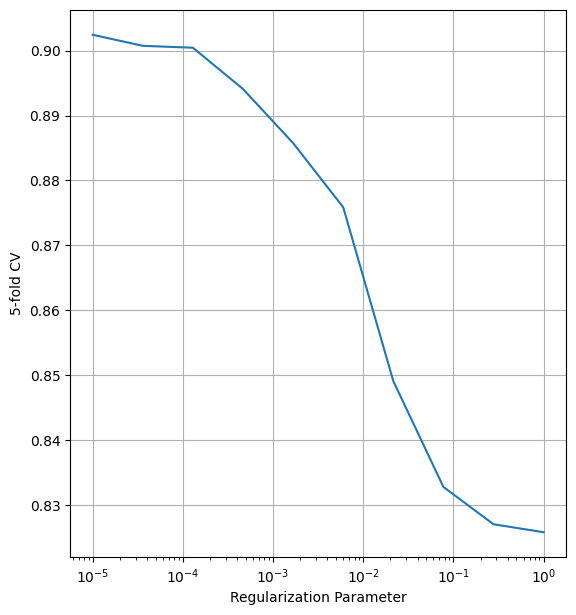

In [12]:
# 5-fold accuarcy for LR classifier with regularization
t=[]
steps_num=10 # number of different regularization parameters
steps=np.logspace(-5,0,num=steps_num) 
kFoldCVs=[]

for i in range(steps_num):
  # defines logistic regression classifier with validation using 20% of the training data and without regularization
  clf= SGDClassifier(loss='log_loss',learning_rate='constant',eta0=best_lr,validation_fraction=0.2,alpha=steps[i]) 
  kFoldScores=cross_val_score(clf, X, y, cv=5) # divides data into 5 folds
  kFoldCV=np.mean(kFoldScores)
  kFoldCVs.append(kFoldCV) # stores training data score for the specified regularization parameters

fig, axs = plt.subplots(1,1)
plt.subplots_adjust(top=1.25)
plt.grid()

axs.plot(steps,kFoldCVs)
axs.set(xlabel='Regularization Parameter', ylabel='5-fold CV')
axs.set_xscale('log')

best_rp=steps[kFoldCVs.index(np.max(kFoldCVs))] # stores the best regularization parameter based on the test data scores
print(f'Best regularization parameter: {best_rp}')
clf= SGDClassifier(loss='log_loss',learning_rate='constant',eta0=best_lr,validation_fraction=0.2,alpha=0).fit(X_train, y_train)
print(f'accuarcy of the best model with regularization for training datas: {clf.score(X_train,y_train)}')
print(f'accuarcy of the best model with regularization for test datas: {clf.score(X_test,y_test)}')


As can be seen, the appropriate amount of learning rate has decreased significantly(1e-05). And the accuarcy of the best model without regularization for training and test datas are:

0.901570527546886

0.9007382501279146